## Dynamics
![](figures/dynamics.png)

## Probabilistic model
![](figures/gmodel.png)

## FFG
![](figures/ar-hgf.png)

In [1]:
include("src/DataAR.jl")
using .DataAR
using ForneyLab
include("HGF/hgf.jl")
using .HGF
using ProgressMeter
using LaTeXStrings
using Random
using LinearAlgebra
using DSP

In [2]:
using Plots
font = Plots.font(20)
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)

Plots.PyPlotBackend()

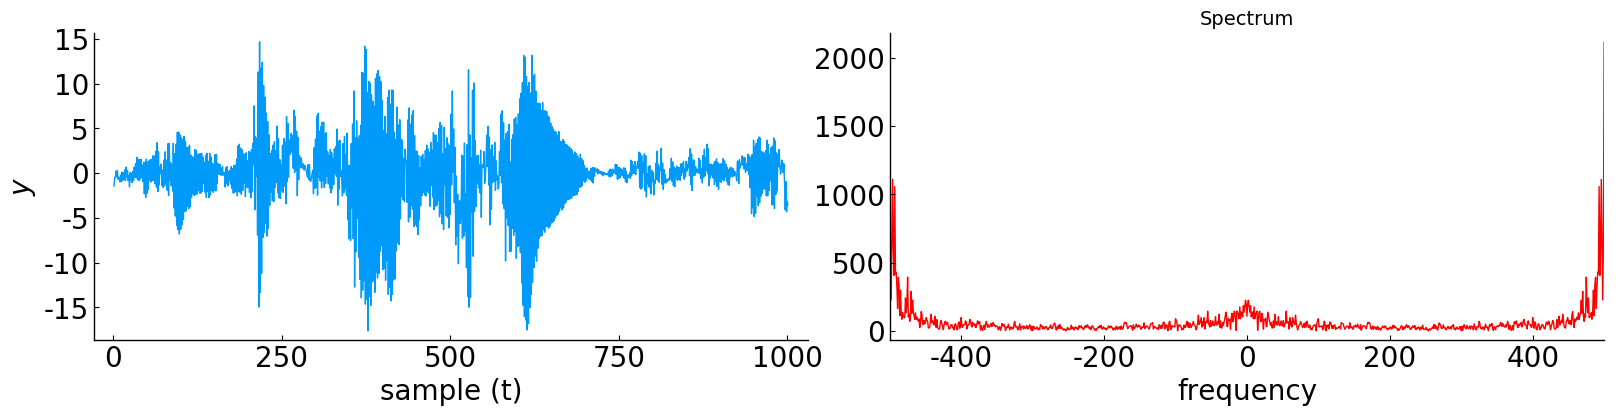

┌ Warning: `fftfreq(n::Int, fs::Real=1)` is deprecated, use `FFTW.fftfreq(n, fs)` instead.
│   caller = top-level scope at In[4]:23
└ @ Core In[4]:23


In [4]:
# Generate AR(2)-HGF
Random.seed!(10)
ARorder = 2
n_samples = 1001
κ, ω, γ = 1, -2, 10
coefs, dataAR, tvar, rw = generateHGFAR(n_samples, ARorder, κ, ω, inv(γ))
observations = [y[1] for y in dataAR]
time_domain = plot(observations, xlabel="sample (t)", ylabel=L"y", label=:none, size=(800,400), legend=:none, grid=false);
savefig(time_domain, "figures/generated_signal.eps")

# Spectrum
N = length(observations) - 1
# Sample period
Ts = 1 / N
# Start time
t0 = 0
tmax = t0 + N * Ts
# time coordinate
t = t0:Ts:tmax

# Fourier Transform of it
F = DSP.fft(observations) |> DSP.fftshift
freqs = DSP.fftfreq(length(t), 1.0/Ts) |> DSP.fftshift

# plots
freq_domain = plot(freqs, abs.(F), color=:red, title = "Spectrum", xlim=(freqs[1], freqs[end]), xlabel="frequency", label="spectrum", legend =false, grid=false);
savefig(freq_domain, "figures/generated_spectrum.eps");

ptotal = plot(time_domain, freq_domain, size=(1600, 400), layout=2)
savefig(ptotal, "figures/generated_signal_and_spectrum.eps");

In [5]:
# Build factor graph

g = FactorGraph()
@RV θ ~ GaussianMeanVariance(placeholder(:m_θ, dims=(ARorder, )), placeholder(:v_θ, dims=(ARorder, ARorder)))
@RV z_t_prev ~ GaussianMeanPrecision(placeholder(:m_z_t_prev), placeholder(:w_z_t_prev))
@RV w_z ~ Gamma(placeholder(:a_w), placeholder(:b_w))
@RV z_t ~ GaussianMeanPrecision(z_t_prev, w_z)
@RV s_t = dot(placeholder(:x_t_prev, dims=(ARorder, )), θ)
@RV ω_t_prev ~ GaussianMeanPrecision(placeholder(:m_ω_prev), placeholder(:w_ω_prev))
@RV ω_t ~ GaussianMeanPrecision(ω_t_prev, 500.0)
@RV κ_t_prev ~ GaussianMeanPrecision(placeholder(:m_κ_prev), placeholder(:w_κ_prev))
@RV κ_t ~ GaussianMeanPrecision(κ_t_prev, 500.0)
@RV x_t ~ GaussianControlledVariance(s_t, z_t, κ_t, ω_t)
@RV y_t ~ GaussianMeanVariance(x_t, tiny)
placeholder(y_t, :y_t)
ForneyLab.draw()

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 10481019765080800718 -->
 
 10481019765080800718 
 
 placeholder_m_θ 
 
<!-- 7469882797363814818 -->
 
 7469882797363814818 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 1729856342267317367 -->
 
 1729856342267317367 
 
 clamp_3 
 
<!-- 7469882797363814818--1729856342267317367 -->
 
 7469882797363814818--1729856342267317367 
 
 clamp_3 
 1 out 
 3 v 
 
<!-- 17027099073229038878 -->
 
 17027099073229038878 
 
 GCV 
 gaussiancontrolledvariance_1 
 
<!-- 7469882797363814818--17027099073229038878 -->
 
 7469882797363814818--17027099073229038878 
 
 x_t 
 1 out 
 2 m 
 
<!-- 9743555776924732496 -->
 
 9743555776924732496 
 
 placeholder_w_κ_prev 
 
<!-- 3838154967134878495 -->
 
 3838154967134878495 
 
 dot 
 dotproduct_1 
 
<!-- 17697417765902777736 -->
 
 17697417765902777736 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 3838154967134878495--17697417765902777736 -->
 
 3838154967134878495--17697417765902777736 
 
 θ 
 1 out 
 2 in1 
 
<!-- 4793025410727384122 -->
 
 4793025410727384122 
 
 placeholder_x_t_prev 
 
<!-- 3838154967134878495--4793025410727384122 -->
 
 3838154967134878495--4793025410727384122 
 
 x_t_prev 
 1 out 
 3 in2 
 
<!-- 8406147166556960226 -->
 
 8406147166556960226 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 5913460357115934974 -->
 
 5913460357115934974 
 
 Gam 
 gamma_1 
 
<!-- 8406147166556960226--5913460357115934974 -->
 
 8406147166556960226--5913460357115934974 
 
 w_z 
 1 out 
 3 w 
 
<!-- 11222557940076683215 -->
 
 11222557940076683215 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 8406147166556960226--11222557940076683215 -->
 
 8406147166556960226--11222557940076683215 
 
 z_t_prev 
 1 out 
 2 m 
 
<!-- 15756502467194522131 -->
 
 15756502467194522131 
 
 placeholder_m_κ_prev 
 
<!-- 158510021967227081 -->
 
 158510021967227081 
 
 placeholder_b_w 
 
<!-- 5804122023537906264 -->
 
 5804122023537906264 
 
 𝒩 
 gaussianmeanprecision_5 
 
<!-- 5804122023537906264--9743555776924732496 -->
 
 5804122023537906264--9743555776924732496 
 
 w_κ_prev 
 1 out 
 3 w 
 
<!-- 5804122023537906264--15756502467194522131 -->
 
 5804122023537906264--15756502467194522131 
 
 m_κ_prev 
 1 out 
 2 m 
 
<!-- 16636844669255248022 -->
 
 16636844669255248022 
 
 placeholder_w_ω_prev 
 
<!-- 11842414241463283426 -->
 
 11842414241463283426 
 
 placeholder_m_z_t_prev 
 
<!-- 14669975441854972510 -->
 
 14669975441854972510 
 
 placeholder_a_w 
 
<!-- 17697417765902777736--10481019765080800718 -->
 
 17697417765902777736--10481019765080800718 
 
 m_θ 
 1 out 
 2 m 
 
<!-- 10520004543311909148 -->
 
 10520004543311909148 
 
 placeholder_v_θ 
 
<!-- 17697417765902777736--10520004543311909148 -->
 
 17697417765902777736--10520004543311909148 
 
 v_θ 
 1 out 
 3 v 
 
<!-- 5913460357115934974--158510021967227081 -->
 
 5913460357115934974--158510021967227081 
 
 b_w 
 1 out 
 3 b 
 
<!-- 5913460357115934974--14669975441854972510 -->
 
 5913460357115934974--14669975441854972510 
 
 a_w 
 1 out 
 2 a 
 
<!-- 6913461077962301760 -->
 
 6913461077962301760 
 
 placeholder_m_ω_prev 
 
<!-- 17027099073229038878--3838154967134878495 -->
 
 17027099073229038878--3838154967134878495 
 
 s_t 
 1 out 
 2 x 
 
<!-- 17027099073229038878--8406147166556960226 -->
 
 17027099073229038878--8406147166556960226 
 
 z_t 
 1 out 
 3 z 
 
<!-- 6969418628694998993 -->
 
 6969418628694998993 
 
 𝒩 
 gaussianmeanprecision_4 
 
<!-- 17027099073229038878--6969418628694998993 -->
 
 17027099073229038878--6969418628694998993 
 
 ω_t 
 1 out 
 5 ω 
 
<!-- 10924864445347705791 -->
 
 10924864445347705791 
 
 𝒩 
 gaussianmeanprecision_6 
 
<!-- 17027099073229038878--10924864445347705791 -->
 
 17027099073229038878--10924864445347705791 
 
 κ_t 
 1 out 
 4 κ 
 
<!-- 5981044205373976895 -->
 
 5981044205373976895 
 
 placeholder_y_

In [6]:
# Specify recognition distribution
q = RecognitionFactorization([s_t, x_t], [z_t, z_t_prev], [ω_t_prev, ω_t], [κ_t_prev, κ_t], w_z, ids=[:X_t :Z_t :Ω :Κ :Γz])

# Build free energy and inference algorithm
algoF = freeEnergyAlgorithm(q)
algo = variationalAlgorithm(q)

eval(Meta.parse(algo))
eval(Meta.parse(algoF))

freeEnergy (generic function with 1 method)

In [7]:
# Priors
mω_0, vω_0 = -3.0, 0.1
mz_0, vz_0 = 1.0, 10.0
mθ_0, vθ_0 = zeros(ARorder), 10*diageye(ARorder)
mκ_0, vκ_0 = 1.5, 0.1
a_w_0, b_w_0 = 0.0001, 0.0001

# Initial marginals q
marginals = Dict()
marginals[:x_t_s_t] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2),v=10*diageye(2))
marginals[:κ_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:ω_t_prev] = ProbabilityDistribution(Multivariate, GaussianMeanVariance, m=zeros(2), v=10*diageye(2))
marginals[:z_t] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:z_t_prev] = ProbabilityDistribution(GaussianMeanVariance, m=mz_0, v=vz_0)
marginals[:ω_t] = ProbabilityDistribution(GaussianMeanVariance, m=mω_0, v=vω_0)
marginals[:w_z] = ProbabilityDistribution(Gamma, a=a_w_0, b=b_w_0)
marginals[:κ_t] = ProbabilityDistribution(GaussianMeanVariance, m=mκ_0, v=vκ_0)

# Number of VMP iterations
n_its = 10

# Data storage
buf_size = n_samples - 1 # we start to process data from the second sample; first is always observed
mω = Array{Float64}(undef, buf_size)
vω = Array{Float64}(undef, buf_size)
ms = Array{Float64}(undef, buf_size)
vs = Array{Float64}(undef, buf_size)
mz = Array{Float64}(undef, buf_size)
vz = Array{Float64}(undef, buf_size)
mθ = Vector{Vector{Float64}}(undef, buf_size)
vθ = Vector{Array{Float64, 2}}(undef, buf_size)
aw = Array{Float64}(undef, buf_size)
bw = Array{Float64}(undef, buf_size)
F = Array{Float64}(undef, buf_size, n_its)
mκ = Array{Float64}(undef, buf_size)
vκ = Array{Float64}(undef, buf_size)

# we make first prediction based on our priors
predictions = [[mθ_0'dataAR[1], sqrt(exp(mκ_0*mz_0 + mω_0))]]

1-element Array{Array{Float64,1},1}:
 [0.0, 0.472367]

In [8]:
p = Progress(length(observations), 1, "Observed ")
for t in 2:n_samples
    update!(p, t)
    data = Dict(:y_t => observations[t],
                :m_z_t_prev => mz_0,
                :w_z_t_prev => inv(vz_0),
                :x_t_prev => dataAR[t-1],
                :m_θ => mθ_0,
                :v_θ => vθ_0,
                :m_ω_prev => mω_0,
                :w_ω_prev => inv(vω_0),
                :a_w => a_w_0,
                :b_w => b_w_0,
                :m_κ_prev => mκ_0,
                :w_κ_prev => inv(vκ_0))
    for i in 1:n_its
        stepZ_t!(data, marginals)
        stepΓz!(data, marginals)
        stepX_t!(data, marginals)
        stepΚ!(data, marginals)
        stepΩ!(data, marginals)
        F[t-1, i] = freeEnergy(data, marginals)
    end
    mω[t-1], vω[t-1] = ForneyLab.unsafeMeanCov(marginals[:ω_t])
    mz[t-1], vz[t-1] = ForneyLab.unsafeMeanCov(marginals[:z_t])
    mθ[t-1], vθ[t-1] = ForneyLab.unsafeMeanCov(marginals[:θ])
    aw[t-1], bw[t-1] = marginals[:w_z].params[:a], marginals[:w_z].params[:b]
    mκ[t-1], vκ[t-1] = ForneyLab.unsafeMeanCov(marginals[:κ_t])
    mz_0, vz_0 = mz[t-1], vz[t-1]
    mθ_0, vθ_0 = mθ[t-1], vθ[t-1]
    mω_0, vω_0 = mω[t-1], vω[t-1]
    mκ_0, vκ_0  = mκ[t-1], vκ[t-1]
    a_w_0, b_w_0 = aw[t-1], bw[t-1]
    ms[t-1], vs[t-1] = ForneyLab.unsafeMeanCov(marginals[:s_t])
    push!(predictions, [mθ_0'dataAR[t], sqrt(exp(mκ_0*mz_0 + mω_0))])
end

Observed   0%|▏                                         |  ETA: 0:55:05┌ Warning: `lgamma(x::Real)` is deprecated, use `(logabsgamma(x))[1]` instead.
│   caller = averageEnergy(::Type{Gamma}, ::ProbabilityDistribution{Univariate,Gamma}, ::ProbabilityDistribution{Univariate,PointMass}, ::ProbabilityDistribution{Univariate,PointMass}) at gamma.jl:88
└ @ ForneyLab /Users/albertpod/.julia/dev/ForneyLab/src/factor_nodes/gamma.jl:88
┌ Warning: `lgamma(x::Real)` is deprecated, use `(logabsgamma(x))[1]` instead.
│   caller = differentialEntropy(::ProbabilityDistribution{Univariate,Gamma}) at gamma.jl:80
└ @ ForneyLab /Users/albertpod/.julia/dev/ForneyLab/src/factor_nodes/gamma.jl:80
Observed 100%|██████████████████████████████████████████| Time: 0:00:30


In [9]:
# Extract time-varying variance
tmp = mκ.^2 .* vz .+ mz.^2 .* vκ .+ vz .* vκ
tvmean = exp.(mκ .* mz .+ mω)
tvvar = exp.(2 .* mκ .* mz .+ 2 .* tmp).* exp.(2 .* mω .+ 2 .*vω) - exp.(2 .* mκ .* mz .+tmp).* exp.(2 .*mω .+ vω);

In [10]:
# Estimated parameters
println("ω: mean=$(mω[end]), var=$(vω[end])")
println("κ: mean=$(mκ[end]), var=$(vκ[end])")
println("γ: mean=$(aw[end]/bw[end]), var=$(aw[end]/bw[end]^2)")

ω: mean=-0.9390426202768414, var=0.056681687902236384
κ: mean=0.48553743603686794, var=0.012425265314095787
γ: mean=4.479830462540206, var=0.040137753918655615


## Plotting

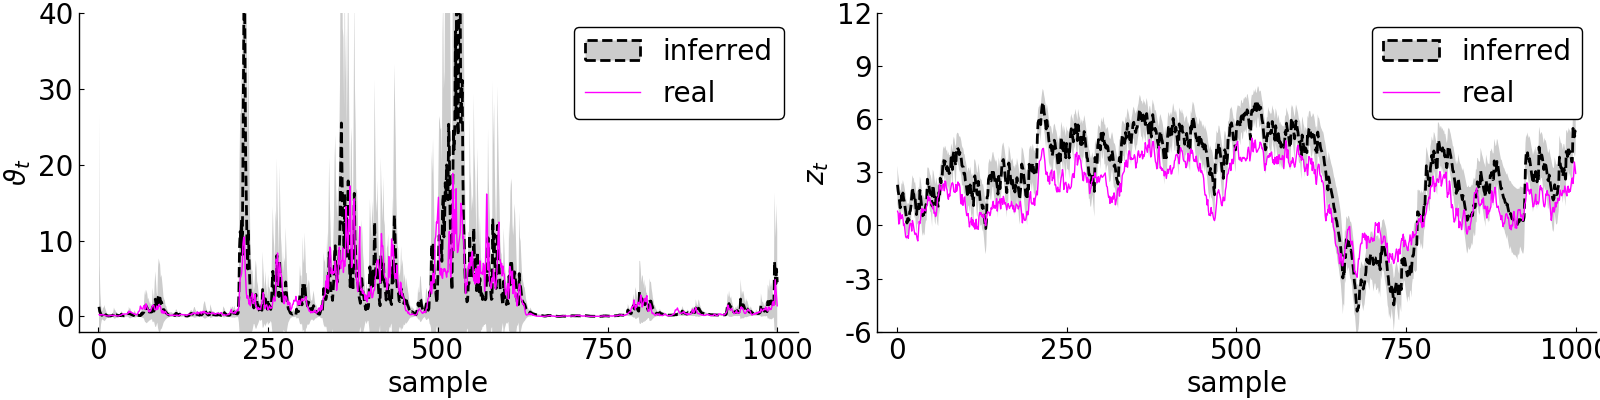

In [13]:
from, upto = 1, 1000

plot(collect(from:upto), tvmean[from:upto], ribbon=sqrt.(tvvar[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label="inferred")
ptvv = plot!(collect(from:upto), tvar[from:upto], color=:magenta, label="real", ylabel=L"\vartheta_t", xlabel="sample (t)", ylims=(-2,40), size=(800,400), legend=:topright, grid=false)
#savefig(ptvv, "figures/vartheta.pdf")

plot(collect(from:upto), mz[from:upto], ribbon=sqrt.(vz[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label="inferred")
pzt = plot!(collect(from:upto), rw[from:upto], color=:magenta, label="real", title="", ylabel=L"z_t", xlabel="sample (t)", ylims=(-6,12), size=(800,400), legend=:topright, grid=false)
#savefig(pzt, "figures/z_t.pdf")

ptvv_zt = plot(ptvv, pzt, layout=(1,2),  size=(1600, 400), legend=true, xlabel="sample")
#savefig(ptvv_zt, "figures/var_total.pdf")

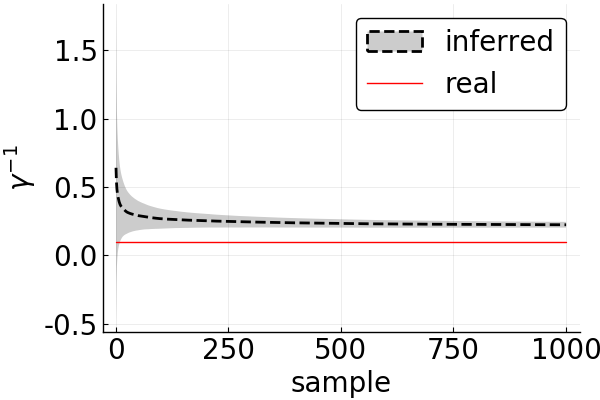

In [12]:
# variance upper layer 1/γ
plot(bw./aw, ribbon=sqrt.(bw./ aw.^2 ),
      linestyle=:dash, linewidth = 2,
      color=:black,
      fillalpha = 0.2,
      fillcolor = :black,
      label="inferred")
plot!(0.1*ones(length(aw)), color=:red, label="real", title="", xlabel="sample", ylabel=L"\gamma^{-1}")

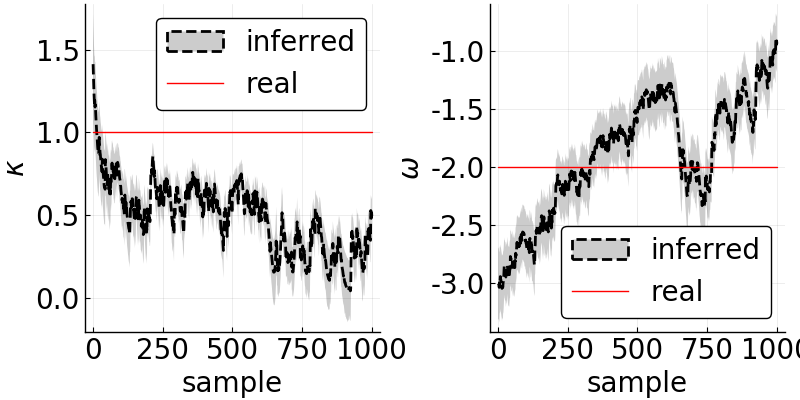

In [14]:
from, upto = 1, 1000

# kappa
plot(collect(from:upto), mκ[from:upto], ribbon=sqrt.(vκ[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label="inferred")
kplot = plot!(collect(from:upto), ones(length(mκ[from:upto])), color=:red, label="real", title="", ylabel=L"\kappa")

# omega
plot(collect(from:upto), mω[from:upto], ribbon=sqrt.(vω[from:upto]), linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black, label="inferred")
oplot = plot!(collect(from:upto), -2*ones(length(mκ[from:upto])), color=:red, label="real", title="", ylabel=L"\omega")

plot(kplot, oplot, layout=(1,2),  size=(800, 400), legend=true, xlabel="sample")

In [15]:
# Plotting countours (only for AR(2))
function plotθ(mθ, vθ, coefs, sample, prior)
    m_θ_0 = prior[1]
    v_θ_0 = prior[2]
    𝓝(x, μ, Σ) = 1/((2 * π)^(length(μ)/2) * det(Σ)^(1/2)) * exp(-(1/2) * (x-μ)' * Σ^(-1) * (x-μ));
    len=64
    plot()
    if coefs[1] < m_θ_0[1]
        xlims!(coefs[1] - 0.42, m_θ_0[1] + 0.42)
    else
        xlims!(m_θ_0[1] - 0.42, coefs[1] + 0.42)
    end
    if coefs[2] < m_θ_0[2]
        ylims!(coefs[2] - 0.42, m_θ_0[2] + 0.42)
    else
        ylims!(m_θ_0[2] - 0.42, coefs[2] + 0.42)
    end
    plot!([m_θ_0[1]],[m_θ_0[2]], seriestype=:scatter, title = "t=$(sample)", label="prior")
    plot!([coefs[1]],[coefs[2]], seriestype=:scatter, label="true")
    plot!([mθ[sample][1]],[mθ[sample][2]], seriestype=:scatter, label="posterior")
    # Posterior
    # get the maximum σ (used to construct the x and y ranges)
    σ_max = sqrt((vθ[sample][1] > vθ[sample][4]) ? vθ[sample][1] : vθ[sample][4])
    rx = range(mθ[sample][1]-3*σ_max, mθ[sample][1]+3*σ_max, length=len)
    ry = range(mθ[sample][2]-3*σ_max, mθ[sample][2]+3*σ_max, length=len)
    pθ1 = contour!(rx, ry, (x1, x2) -> 𝓝([x1 ; x2], mθ[sample], vθ[sample]), xlabel=L"\theta_1", ylabel=L"\theta_2", levels=4, cbar=false, grid=false)
    return pθ1
end

plotθ (generic function with 1 method)

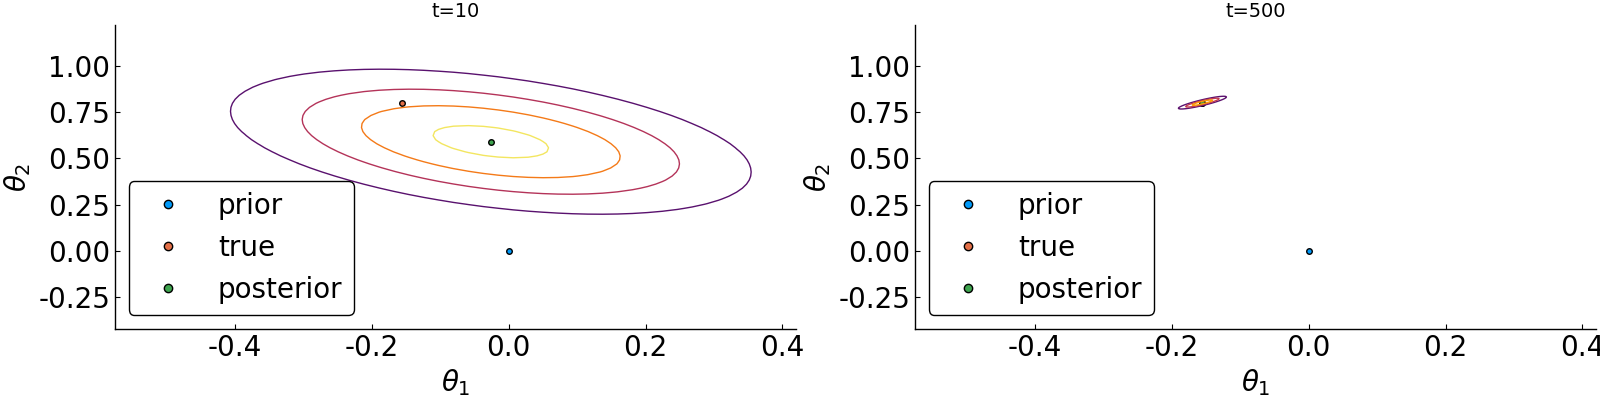

In [16]:
# AR coefs
ARorder = 2
pθtprev = plotθ(mθ, vθ, coefs, 10, [zeros(ARorder), 10*diageye(ARorder)])
p1 = plot(pθtprev, size=(800,400), legend=:bottomleft)
#savefig(p1, "figures/theta_t10.eps")

pθt = plotθ(mθ, vθ, coefs, 500, [zeros(ARorder), 10*diageye(ARorder)])
p2 = plot(pθt, size=(800,400), legend=:bottomleft)
#savefig(p2, "figures/theta_t500.eps")

plot(p1, p2, layout=(1,2),  size=(1600, 400), legend=:bottomleft)
#savefig("figures/theta_total.eps")

## Model comparison

In [17]:
# AR with gamma prior on process noise precision

g = FactorGraph()

@RV θg ~ GaussianMeanVariance(placeholder(:mg_θ, dims=(ARorder, )), placeholder(:vg_θ, dims=(ARorder, ARorder)))
@RV γg ~ Gamma(placeholder(:ag), placeholder(:bg))
@RV x_t ~ GaussianMeanPrecision(dot(placeholder(:x_t_prev, dims=(ARorder, )), θg), γg)
placeholder(x_t, :x_t)

qg = RecognitionFactorization(θg, γg, ids=[:Θ :Γ])
algoF = freeEnergyAlgorithm(qg)
algo = variationalAlgorithm(qg)

eval(Meta.parse(algo))
eval(Meta.parse(algoF))

marginals = Dict()

ag_0 = 0.0001
bg_0 = 1.0
mθg_0 = zeros(ARorder)
vθg_0 = 10*diageye(ARorder)

n_its = 10
mθg = Vector{Vector{Float64}}(undef, n_samples-1)
vθg = Vector{Array{Float64, 2}}(undef, n_samples-1)
awg = Array{Float64}(undef,n_samples-1)
bwg = Array{Float64}(undef,n_samples-1)
Fg = Array{Float64}(undef,n_samples-1, n_its)

marginals[:γg] = ProbabilityDistribution(Univariate, Gamma, a=ag_0, b=bg_0)

predictionsG = [[mθg_0'dataAR[1], sqrt(bg_0/ag_0)]]
p = Progress(length(observations), 1, "Observed ")
for t in 2:n_samples
    update!(p, t)
    data = Dict(:x_t => observations[t],
                :x_t_prev => dataAR[t-1],
                :mg_θ => mθg_0,
                :vg_θ => vθg_0,
                :ag => ag_0,
                :bg => bg_0)
    for i in 1:n_its
        stepΘ!(data, marginals)
        stepΓ!(data, marginals)
        Fg[t-1, i] = freeEnergy(data, marginals)
    end
    mθg[t-1], vθg[t-1] = ForneyLab.unsafeMeanCov(marginals[:θg])
    awg[t-1], bwg[t-1] = marginals[:γg].params[:a], marginals[:γg].params[:b]
    mθg_0 = mθg[t-1]
    vθg_0 = vθg[t-1]
    ag_0, bg_0 = awg[t-1], bwg[t-1]
    push!(predictionsG, [mθg_0'dataAR[t], sqrt(bg_0/ag_0)])
end

Observed 100%|██████████████████████████████████████████| Time: 0:00:04


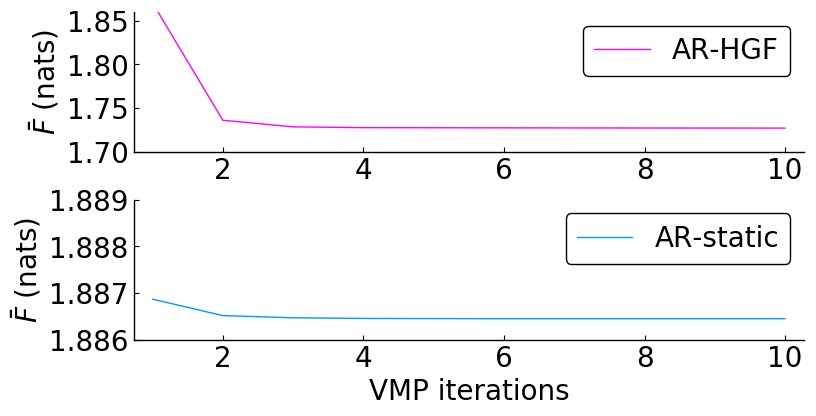

In [18]:
# free energy over iterations
fei = plot(sum(F, dims=1)'./buf_size, label="AR-HGF", color="magenta", xlabel="", ylabel=L"$\bar{F}$ (nats)", legend=:topright, size=(800,200), grid=false, yticks=1.70:0.05:1.86,  ylims=(1.70,1.86))
#savefig(fei, "figures/fe_iterations-HGF.eps")
feig = plot(sum(Fg,dims=1)'./buf_size, label="AR-static", xlabel="VMP iterations", ylabel=L"$\bar{F}$ (nats)", legend=:topright, size=(800,200), grid=false, yticks=1.886:0.001:1.889,  ylims=(1.886,1.889))
#savefig(feig, "figures/fe_iterations-gamma.eps")
plot(fei, feig, layout=(2, 1),  size=(800, 400))
#savefig("figures/fe_total.eps")

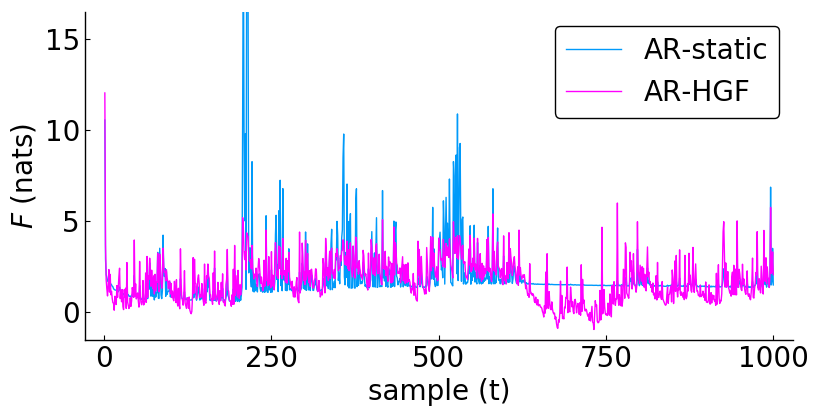

In [19]:
# FE over time
fe = F[:,end]
feg = Fg[:,end]
plot(feg, label="AR-static")
fet = plot!(fe, xlabel="sample (t)", color="magenta", ylabel=L"$F$ (nats)", label="AR-HGF", ylims=[-1, 16], size=(800,400), grid=false)
#savefig("figures/fe_time.eps")

## Animations

In [ ]:
lfont = Plots.font(10)
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=lfont)

# Define functions for animation
function animate_states(means, vars, y, label; delta=1.0, toshow=10, option=:solid)
    if option == :solid
        ahead = toshow
    else
        ahead = 2*toshow
    end
    anim = @animate for i in 1:length(means)-ahead-1
        min = minimum(y[i:i+toshow]) <= minimum(means[i:i+toshow]) ? minimum(y[i:i+toshow]) : minimum(means[i:i+toshow])
        max = maximum(y[i:i+toshow]) >= maximum(means[i:i+toshow]) ? maximum(y[i:i+toshow]) : maximum(means[i:i+toshow])
        s = plot(xticks = i:div(toshow, 2):i+toshow, xlims=(i,i+1.5*toshow));
        ylims!(min - delta, max + delta);
        if option == :solid
            plot(collect(i:i+toshow), y[i:i+toshow], color=:magenta, xlabel="time T", ylabel=label, label="real")
            fcolor = :black
        else
            scatter!(collect(i:i+toshow), y[i:i+toshow], xlabel="time T", ylabel=label, label="observation",
            markershape = :xcross, markeralpha = 0.9, markersize = 3)
            fcolor = :orange
        end
        plot!(collect(i:i+ahead), means[i:i+ahead], ribbon=sqrt.(vars[i:i+ahead]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = fcolor,
             label=option==:solid ? "inferred" : "prediction", legend=:topright)
    end;
    return anim
end

function animate_params(means, vars, y, label; delta=.1)
   anim = @animate for i in 1:length(means)
        s = plot(y, label="real", ylabel=label, color=:magenta);
        min = minimum(y) <= minimum(means) ? minimum(y) : minimum(means)
        max = maximum(y) >= maximum(means) ? maximum(y) : maximum(means)
        ylims!(min - delta, max + delta);
        plot!(collect(1:i), means[1:i], ribbon=sqrt.(vars[1:i]),
             linestyle=:dash, linewidth = 2,
             color=:black,
             fillalpha = 0.2,
             fillcolor = :black,
             label="inferred", legend=:topright)
   end;
   return anim
end

In [ ]:
# κ
animation = animate_params(mκ, vκ, κ*ones(length(mκ)), L"\kappa")
gif(animation, "gifs/kappa.gif", fps = 100);

In [ ]:
# ω
animation = animate_params(mω, vω, ω*ones(length(mω)), L"\omega")
gif(animation, "gifs/omega.gif", fps = 100)

In [ ]:
# γ
animation = animate_params(bw./aw, bw./ aw.^2, inv(γ)*ones(length(mκ)), L"\gamma^{-1}", delta=0.5)
gif(animation, "gifs/gamma.gif", fps = 100)

In [ ]:
# time varying variance
animation = animate_states(tvmean, tvvar, tvar, L"\exp(\kappa_t z_t + \omega_t)", toshow=100)
gif(animation, "gifs/variance.gif", fps = 10)

In [ ]:
# Random walk
animation = animate_states(mz, vz, rw, L"z_t", delta=1.0, toshow=100)
gif(animation, "gifs/rw.gif", fps = 10)

In [ ]:
# AR coefs (only for AR-HGF(2))
anim = @animate for i in 1:1:length(mθ)
    plotθ(mθ, vθ, coefs, i, [zeros(ARorder), 10*diageye(ARorder)])
end;
gif(anim, "gifs/coefevo.gif", fps = 100)

In [ ]:
# predictions
means = [x[1] for x in predictions]
vars = [x[2] for x in predictions]
animation = animate_states(means, vars, observations[2:end], L"y_t", toshow=10, option=:dashed)
gif(animation, "gifs/predictions.gif", fps = 10)

![]("gifs/predictions.gif")